# 2nd Homework of ADM

## Group members
1. Nurbek Khalmatay, 2184569, khalmatay.2184569@studenti.uniroma1.it
2. Augusto
3. Sezer
4. Paolo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
# Set to True the first time you run this file to install the required packages
install_packages = True
if install_packages:
    %pip install -r requirements.txt
import os

if not os.path.exists('data'):
    os.makedirs('data')

if not all(os.path.exists(folder) for folder in ['data/steam_reviews.csv']):
    !gdown 1ELFPkOeFlwHth8zq5-54xXytZKy0xs-c
    !unzip -o data_steam_reviews.zip
    !rm data_steam_reviews.zip
    !mv steam_reviews.csv data/steam_reviews.csv


In [17]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

csv_file_path = 'data/steam_reviews.csv'



In [18]:
df = pd.read_csv(csv_file_path,  usecols = ['app_name','review','review_id','recommended', 'steam_purchase', 'received_for_free' ])

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [9]:
df.describe()

,review_id
count,21747371.000
mean,51874995.361
std,20842672.746
min,43.000
25%,36393551.500
50%,53840585.000
75%,69287931.500
max,85218673.000


In [19]:
data = pd.read_csv(csv_file_path, nrows=1000 )

In [20]:
data.columns


Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [26]:
'''
Understand your data
1) index (int64)
2) app_id - app/game id (int64)
3) app_name - app/game name (object)(str)
4) review_id (int64)
5) language (object)(str)
6) review (object)(str)
7) timestamp_created - date the review was crated (unix)(int64)
8) timestamp_updated - date the review was last updated (unix) (timestamp_created <= timestamp_updated)(int64)
9) recommmend - (bool)
10) votes_helpful -  the number of users that found this review helpful (int64)
11) votes_funny - the number of users that found this review funny(int64)
12) weighted_vote_score	- helpfulness score (float64)
13) comment_count- number of comments posted on this review (int64)
14) steam_purchase - true if the user purchased the game on Steam(bool)
15) received_for_free - true if the user checked a box saying they got the app for free (bool)
16) written_during_early_access - if the user posted this review while the game was in Early Access (bool)
17) author.steamid	- the user’s SteamID (int64)
18) author.num_games_owned - number of games owned by the user(int64)
19) author.num_reviews	- number of reviews written by the user(int64)
20)	author.playtime_forever - lifetime playtime tracked in this app (float64)
21) author.playtime_last_two_weeks - playtime tracked in the past two weeks for this app(float64)
22) author.playtime_at_review	- playtime when the review was written(float64)
23) author.last_played -  time for when the user last played(float64)
'''

'\nUnderstand your data\n1) index (int64)\n2) app_id - app/game id (int64)\n3) app_name - app/game name (object)(str)\n4) review_id (int64)\n5) language (object)(str)\n6) review (object)(str)\n7) timestamp_created - date the review was crated (unix)(int64)\n8) timestamp_updated - date the review was last updated (unix) (timestamp_created <= timestamp_updated)(int64)\n9) recommmend - (bool)\n10) votes_helpful -  the number of users that found this review helpful (int64)\n11) votes_funny - the number of users that found this review funny(int64)\n12) weighted_vote_score\t- helpfulness score (float64)\n13) comment_count- number of comments posted on this review (int64)\n14) steam_purchase - true if the user purchased the game on Steam(bool)\n15) received_for_free - true if the user checked a box saying they got the app for free (bool)\n16) written_during_early_access - if the user posted this review while the game was in Early Access (bool)\n17) author.steamid\t- the user’s SteamID (int64)

In [25]:
data.dtypes

,0
Unnamed: 0,int64
app_id,int64
app_name,object
review_id,int64
language,object
review,object
timestamp_created,int64
timestamp_updated,int64
recommended,bool
votes_helpful,int64


In [23]:
data

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.000,0,True,False,False,76561199095369542,6,2,1909.000,1448.000,1909.000,1611343383.000
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.000,0,True,False,False,76561198949504115,30,10,2764.000,2743.000,2674.000,1611386307.000
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.000,0,True,False,False,76561199090098988,5,1,1061.000,1061.000,1060.000,1611383777.000
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.000,0,True,False,False,76561199054755373,5,3,5587.000,3200.000,5524.000,1611383744.000
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,0.000,0,True,False,False,76561199028326951,7,4,217.000,42.000,217.000,1610788249.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,292030,The Witcher 3: Wild Hunt,84987795,english,Best game ever made,1611077740,1611077740,True,0,0,0.000,0,True,False,False,76561198382879119,47,8,3799.000,3369.000,2802.000,1611348109.000
996,996,292030,The Witcher 3: Wild Hunt,84987754,english,"As a long-term fan of RPG's, this one hits all...",1611077693,1611077693,True,0,0,0.000,0,True,False,False,76561199080934831,8,3,9118.000,4853.000,8087.000,1611349946.000
997,997,292030,The Witcher 3: Wild Hunt,84987491,russian,Однажды я отложил ее в долгий ящик... и зря! Л...,1611077325,1611077325,True,0,0,0.486,0,True,True,False,76561198954761392,22,1,2629.000,1473.000,2600.000,1611160097.000
998,998,292030,The Witcher 3: Wild Hunt,84987345,schinese,买就完事儿了,1611077119,1611077119,True,0,0,0.000,0,True,False,False,76561198411688068,34,2,9679.000,4.000,9679.000,1610780386.000


# RQ3


*   Plot the number of reviews submitted each month and describe any trends.
*   Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.




In [ ]:
count_review_created  = pd.read_csv(csv_file_path, usecols=["review_id", "timestamp_created", "timestamp_updated"])

In [ ]:

count_review_created

In [ ]:
count_review_created['timestamp_created'] = pd.to_datetime(count_review_created['timestamp_created'], unit='s')
count_review_created['timestamp_updated'] = pd.to_datetime(count_review_created['timestamp_updated'], unit='s')
count_review_created['month_created'] = count_review_created['timestamp_created'].dt.month
count_review_created['month_updated'] = count_review_created['timestamp_updated'].dt.month

In [ ]:
count_review_created

In [35]:
month_review_counts = count_review_created.groupby('year_month_created').size().reset_index(name='review_count')


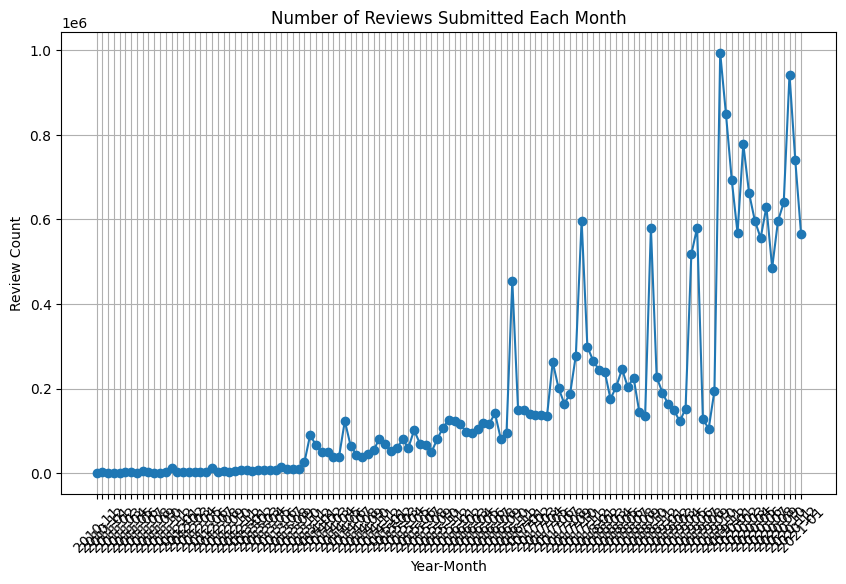

In [36]:
import matplotlib.pyplot as plt

# Plotting the monthly review counts
plt.figure(figsize=(10, 6))
plt.plot(month_review_counts['year_month_created'].astype(str), month_review_counts['review_count'], marker='o', linestyle='-')
plt.title("Number of Reviews Submitted Each Month")
plt.xlabel("Year-Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.grid()

plt.show()